<a href="https://colab.research.google.com/github/vcngeno/Building_Logistic_Regression_Models/blob/main/Building_Logistic_Regression_Models_Vanessa_Ngeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

##Import the Libraries

In [ ]:
#Data Manipulation
import numpy as np
import pandas as pd
#Libraries for Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Libraries for missingno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.facecolor'] = '#00000000'
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#file system management
import os
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

##Load the Data

In [ ]:
data =  pd.read_csv('/content/application_train.csv')

data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Identify feature types
cat_var = data.select_dtypes(include=['object']).columns.tolist()
num_var = data.drop('TARGET', axis=1).select_dtypes(include=['int64', 'float64']).columns.tolist()
target = 'TARGET'

print("Categorical Features:", cat_var)
print("Numerical Features:", num_var)

Categorical Features: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Numerical Features: ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOU

# Feature Engineering

## One Hot-Encoding

In [ ]:
!pip install category_encoders
import category_encoders as ce
for_dummyX = data[cat_var]
# Fit to data, then transform it.
ec = ce.OneHotEncoder(cols=cat_var, use_cat_names=True, handle_unknown='indicator').fit(for_dummyX)
X_dummy = ec.fit_transform(for_dummyX)
X_dummy.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00


,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_-1,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,CODE_GENDER_-1,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_-1,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_nan,WALLSMATERIAL_MODE_-1,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,EMERGENCYSTATE_MODE_-1
0,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
X_dummy.shape

(307511, 162)

In [ ]:
import numpy as np

noise_level = 0.01  # adjust the standard deviation to your needs

for col in cat_var:
    # Calculate mean of TARGET grouped by the categorical column
    category_means = data.groupby(col)['TARGET'].mean()
    # Map the means back to the original dataframe
    encoded = data[col].map(category_means)
    # Add Gaussian noise to each encoded value
    data[col + '_ME'] = encoded + np.random.normal(0, noise_level, size=data.shape[0])

## Dealing with Missing Values

Filling missing values in numeric columns with mean

In [ ]:
num_df = data[num_var]
# Check if there are any missing values
missing_values = num_df.isnull().sum()
# Print the count of missing values per column
print("Missing values per column:", missing_values)

Missing values per column: SK_ID_CURR                        0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 105, dtype: int64


In [ ]:
# Loop through each column and impute missing values with the mean of the column
for column in num_df.columns:
    mean_value = num_df[column].mean()  # Calculate the mean of the column (ignoring NaNs)
    num_df[column].fillna(mean_value, inplace=True)  # Impute missing values with the mean

In [ ]:
missing_values = num_df.isnull().sum()
print("Missing values per column:", missing_values)

Missing values per column: SK_ID_CURR                    0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 105, dtype: int64


In [ ]:
X = pd.concat([X_dummy, num_df], axis=1)
X.shape

(307511, 267)

# Standardizing the data

The coefficients in a logistic regression are the variable importance.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the DataFrame
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Print results
print("Original DataFrame:")
X_scaled.head()

Original DataFrame:


,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_-1,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,CODE_GENDER_-1,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_-1,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.324395,-0.324395,0.0,1.388176,-1.388135,-0.003607,0.0,0.717914,-0.717914,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-5.176655e-01
1,0.324395,-0.324395,0.0,-0.720370,0.720391,-0.003607,0.0,0.717914,-0.717914,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00
2,-3.082659,3.082659,0.0,1.388176,-1.388135,-0.003607,0.0,-1.392925,1.392925,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00
3,0.324395,-0.324395,0.0,-0.720370,0.720391,-0.003607,0.0,0.717914,-0.717914,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,3.336720e-17,0.000000,-3.645032e-17,0.000000,-7.516682e-17,-3.831603e-16
4,0.324395,-0.324395,0.0,1.388176,-1.388135,-0.003607,0.0,0.717914,-0.717914,0.0,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00


### Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data[target], random_state=0)
[X_train.shape,X_test.shape, y_train.shape, y_test.shape]

[(230633, 267), (76878, 267), (230633,), (76878,)]

## Build a Logistic Regression Model

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-score)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Display model coefficients (for log-odds interpretation)
print('Model Coefficients:')
print(f'Intercept (β0): {model.intercept_[0]}')
print(f'Coefficients (β1, β2): {model.coef_}')

Accuracy: 0.92
Confusion Matrix:
[[70712    75]
 [ 6017    74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70787
           1       0.50      0.01      0.02      6091

    accuracy                           0.92     76878
   macro avg       0.71      0.51      0.49     76878
weighted avg       0.89      0.92      0.88     76878

Model Coefficients:
Intercept (β0): -2.7848810800004884
Coefficients (β1, β2): [[-7.37973290e-03  7.37973290e-03  0.00000000e+00  7.56166836e-02
  -7.52684478e-02 -4.57017734e-02  0.00000000e+00  6.33622813e-02
  -6.33622813e-02  0.00000000e+00  7.10954854e-03 -7.10954854e-03
   0.00000000e+00  9.89774110e-03 -7.02981274e-03 -1.35770369e-02
   1.26925422e-02 -7.33756480e-03  7.03542973e-03  9.47224486e-04
  -6.79232121e-03  0.00000000e+00  4.61679661e-02 -7.75473298e-03
   7.05586595e-03 -6.06319912e-02  2.10973462e-02 -9.21476759e-02
  -5.15615314e-02  1.19925428e-02  0.00000000

##Variable Importance

The coefficients in a logistic regression are the variable importance.

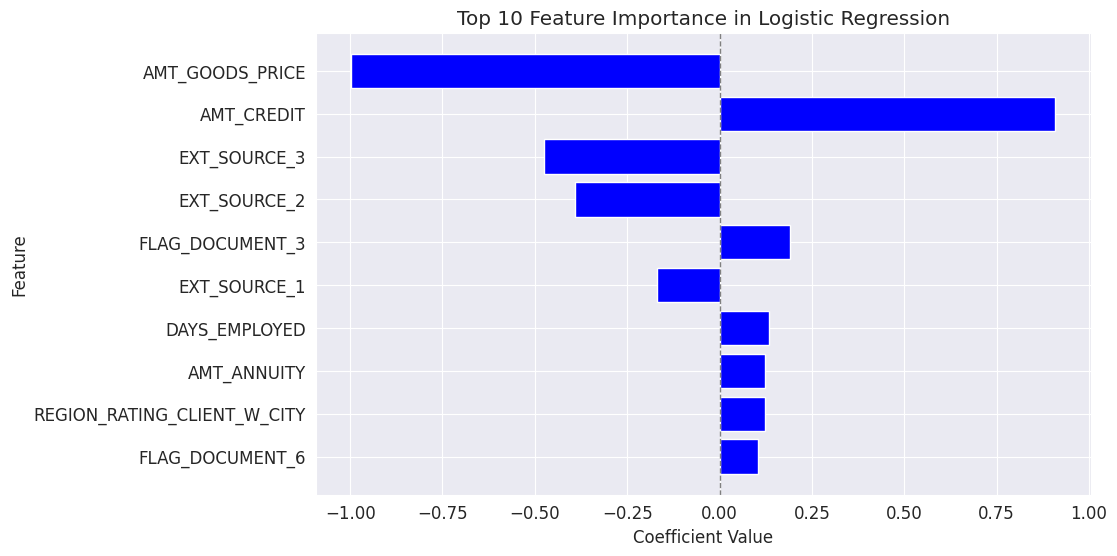

In [ ]:
def MyVarImp(model, X):
    # Get feature importance (coefficients)
    importance = model.coef_[0]  # Coefficients are in model.coef_

    # Create a DataFrame for better visualization
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': importance})

    # Calculate the absolute coefficient and sort in descending order
    importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
    top10 = importance_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)

    # Plot feature importance for the top 10 variables
    plt.figure(figsize=(10, 6))
    plt.barh(top10['Feature'], top10['Coefficient'], color='blue')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title('Top 10 Feature Importance in Logistic Regression')
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
    plt.gca().invert_yaxis()  # Optional: Highest importance at the top
    plt.show()

# Example usage:
MyVarImp(model, X_train)


## Prediction



In [ ]:
# Predict probabilities on test set
probs = model.predict_proba(X_test)
# Print probability predictions for the first 5 instances
print("Predicted probabilities (first 5 rows):")
print(probs[:5])

Predicted probabilities (first 5 rows):
[[0.74564469 0.25435531]
 [0.96328261 0.03671739]
 [0.92340846 0.07659154]
 [0.95702581 0.04297419]
 [0.73383156 0.26616844]]


##Prediction Using Prediction Functions predict() and predict_proba()

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
train_proba = model.predict_proba(X_train)
test_proba = model.predict_proba(X_test)
test_proba

array([[0.74564469, 0.25435531],
       [0.96328261, 0.03671739],
       [0.92340846, 0.07659154],
       ...,
       [0.97753072, 0.02246928],
       [0.7486541 , 0.2513459 ],
       [0.95611966, 0.04388034]])

## Evaluating the model performance

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score
from scipy.stats import ks_2samp

Accuracy: 0.9208


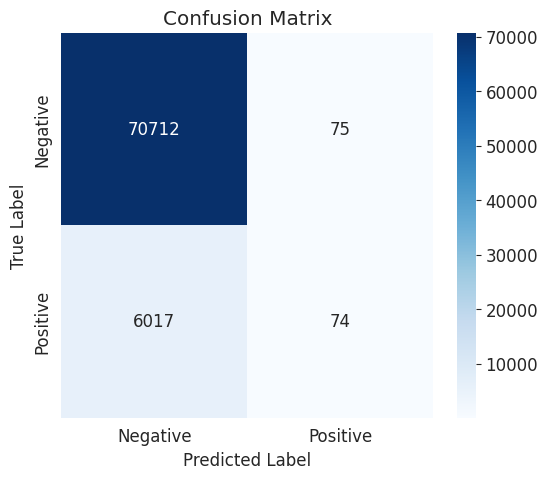

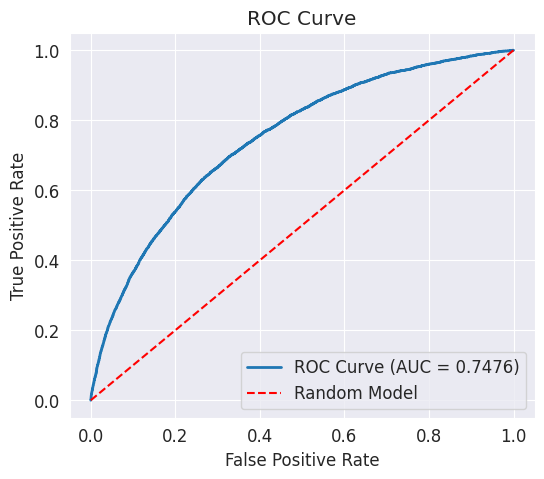

AUC Score: 0.7476
Precision: 0.4966
Recall: 0.0121
F1 Score: 0.0237
Kolmogorov-Smirnov (K-S) Statistic: 0.3690


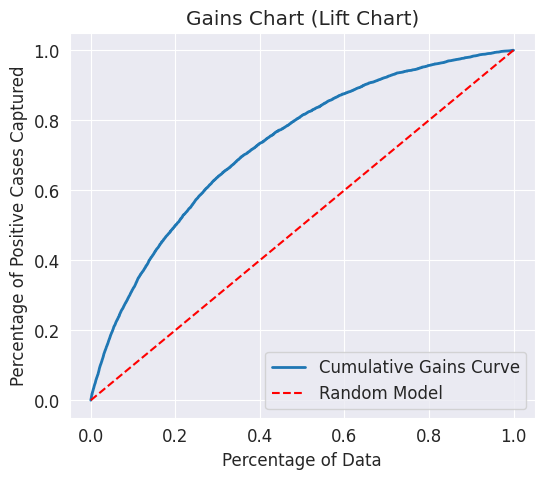

In [ ]:
# 1. Accuracy
# ------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ------------------------------
# 2. Confusion Matrix
# ------------------------------
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ------------------------------
# 3. ROC Curve and AUC Score
# ------------------------------
# Extract probabilities for the positive class (assumed to be at index 1)
y_pred_proba_positive = test_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'r--', label='Random Model')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

# ------------------------------
# 4. Precision, Recall, and F1 Score
# ------------------------------
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ------------------------------
# 5. Kolmogorov-Smirnov (K-S) Statistic
# ------------------------------
# Compute K-S statistic between positive and negative predicted probabilities
ks_statistic, ks_p_value = ks_2samp(y_pred_proba_positive[y_test == 1],
                                    y_pred_proba_positive[y_test == 0])
print(f"Kolmogorov-Smirnov (K-S) Statistic: {ks_statistic:.4f}")

# ------------------------------
# 6. Gains Table (Cumulative Gains / Lift Chart)
# ------------------------------
# Create a DataFrame with true labels and predicted probabilities (positive class)
df_gains = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba_positive})
df_gains = df_gains.sort_values(by='y_pred_proba', ascending=False).reset_index(drop=True)
df_gains['cumulative_positive'] = df_gains['y_test'].cumsum()
df_gains['cumulative_total'] = np.arange(1, len(df_gains) + 1)
df_gains['cumulative_gain'] = df_gains['cumulative_positive'] / df_gains['y_test'].sum()

plt.figure(figsize=(6, 5))
plt.plot(df_gains['cumulative_total'] / len(df_gains), df_gains['cumulative_gain'],
         label="Cumulative Gains Curve", linewidth=2)
plt.plot([0, 1], [0, 1], 'r--', label="Random Model")
plt.xlabel("Percentage of Data")
plt.ylabel("Percentage of Positive Cases Captured")
plt.title("Gains Chart (Lift Chart)")
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install dataframe_image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 13.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import dataframe_image as dfi

df1 = pd.read_csv('/content/Comparison.csv')

# Use the 'matplotlib' backend instead of Playwright
dfi.export(df1, 'table_image.png', table_conversion='matplotlib')

# Model Comparison



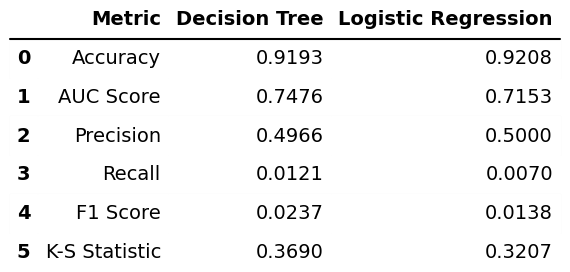

In [ ]:
from IPython.display import display
from PIL import Image

# Load and display the image
img = Image.open("table_image.png")
display(img)

#Insights and Conclusion
###Overall Discrimination
Although both models have similar accuracy, the decision tree’s superior AUC and K-S statistic suggest better class separation at various thresholds.

###Positive Class Detection
The decision tree performs slightly better in recall and F1 score, meaning it identifies a higher percentage of positive cases—a critical factor if detecting positives is a priority.

###Trade-offs
Logistic regression has marginally better precision and accuracy, but these advantages may not be as useful if the goal is to improve positive class detection, given its lower recall and overall discrimination ability.

###Recommendation
If the primary objective is to enhance class separation and sensitivity, the decision tree model is the better choice. However, the extremely low recall in both models indicates potential data imbalance, suggesting a need for further model adjustments, threshold tuning, or alternative techniques such as resampling or cost-sensitive learning.

#Conclusion
While both models perform similarly in precision and accuracy, the decision tree outperforms logistic regression in AUC, recall, F1 score, and the K-S statistic. This highlights its superior discriminatory power and better ability to detect positive cases, making it the preferable option when identifying the minority class is crucial.